In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics
import time

# to ignore the warnings
from warnings import filterwarnings

In [200]:
scores_df = pd.read_excel('./data/game_scores.xlsx')
scores_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [201]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14242 non-null  object 
 1   visitor         14242 non-null  object 
 2   home            14242 non-null  object 
 3   visitor_points  12724 non-null  float64
 4   home_points     12724 non-null  float64
dtypes: float64(2), object(3)
memory usage: 556.5+ KB


In [202]:
# Find columns and total null values
scores_df.isnull().sum()

date                 0
visitor              0
home                 0
visitor_points    1518
home_points       1518
dtype: int64

In [203]:
# Convert date object to datetime data type
scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            13926 non-null  datetime64[ns, UTC]
 1   visitor         14242 non-null  object             
 2   home            14242 non-null  object             
 3   visitor_points  12724 non-null  float64            
 4   home_points     12724 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 556.5+ KB


In [204]:
# Find rows that contain null values
scores_df[scores_df['visitor_points'].isnull()]

,date,visitor,home,visitor_points,home_points
23,2024-11-05 00:45:00+00:00,Boston Celtics,Atlanta Hawks,NaN,NaN
46,2024-11-13 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
47,2025-01-19 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
82,2025-03-16 22:00:00+00:00,Atlanta Hawks,Brooklyn Nets,NaN,NaN
83,2025-04-10 23:30:00+00:00,Atlanta Hawks,Brooklyn Nets,NaN,NaN
...,...,...,...,...,...
14210,NaT,Toronto Raptors,Washington Wizards,NaN,NaN
14220,2025-01-30 00:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14221,2025-03-24 23:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14231,2025-03-06 00:00:00+00:00,Utah Jazz,Washington Wizards,NaN,NaN


In [205]:
# Getting today's date
todays_Date = dt.date.fromtimestamp(time.time())
 
# Calling the isoformat() function over the
# today's date
date_in_ISOFormat = todays_Date.isoformat()

# Create a dataframe with no dates past current day
df = scores_df.loc[scores_df['date'] <= date_in_ISOFormat]

# Reset index
df.reset_index(inplace=True, drop=True)

# Display
df

,date,visitor,home,visitor_points,home_points
0,2015-11-25 01:00:00+00:00,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09 23:30:00+00:00,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16 23:00:00+00:00,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19 23:00:00+00:00,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27 00:30:00+00:00,Boston Celtics,Atlanta Hawks,83.0,110.0
...,...,...,...,...,...
12754,2020-02-29 02:00:00+00:00,Washington Wizards,Utah Jazz,119.0,129.0
12755,2021-04-13 01:00:00+00:00,Washington Wizards,Utah Jazz,125.0,121.0
12756,2021-12-19 02:00:00+00:00,Washington Wizards,Utah Jazz,109.0,103.0
12757,2022-12-23 02:00:00+00:00,Washington Wizards,Utah Jazz,112.0,120.0


# Analysis

In [281]:
def possible_outcome(dataframe, away_team, home_team): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {home_team} vs {away_team}')
    
    # Plot the winner count    
    sns.countplot(data=matchup_game, x='winner', ax=axes[1], palette='Set2')
    axes[1].set_title(f'Winner Counts: {home_team} vs {away_team}')
    
    # Display the plots
    plt.tight_layout()
    plt.show()
    
    
    # Calculate a z-score from a provided mean and standard deviation
    mean = matchup_game.groupby('visitor')['total_points'].mean().values
    standard_deviation = matchup_game.groupby('visitor')['total_points'].std().values
    under_over_lines = [225.5, 226.5, 227.5, 228.5, 229.5, 230.5]
    
    print(f'Statistics of {away_team} vs {home_team}')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')
    


    for value in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(value)
        print(f'Z-score for {value}: {zscore:.2f}')

    return matchup_game

In [207]:
teams = df['visitor'].unique()
teams

array(['Boston Celtics', 'Atlanta Hawks', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)

C:\Users\User\AppData\Local\Temp\ipykernel_11364\2855515957.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matchup_game, x='winner', ax=axes[1], palette='Set2')


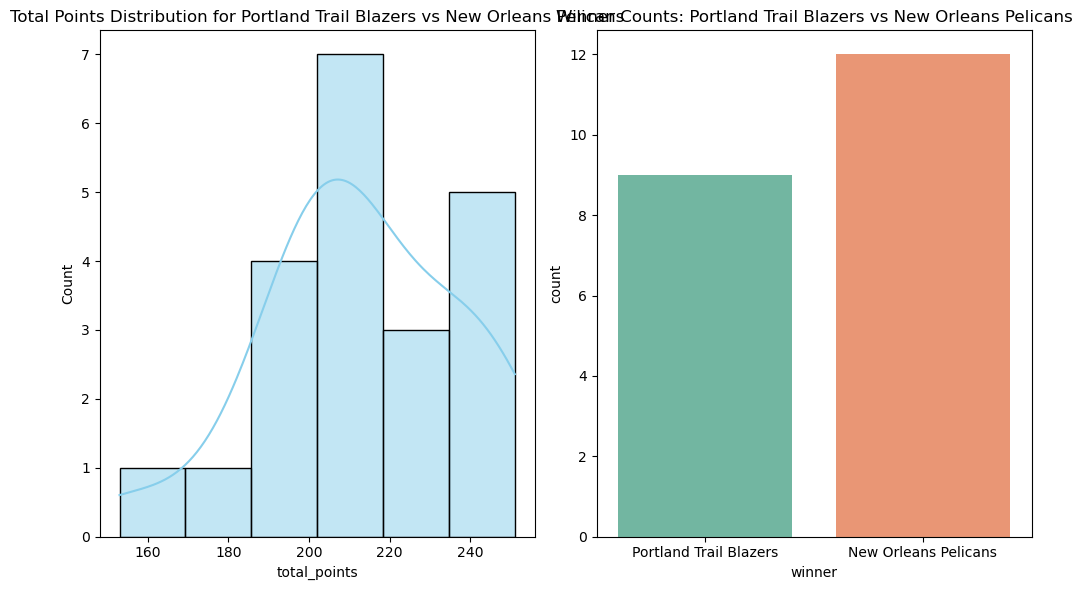

Statistics of New Orleans Pelicans vs Portland Trail Blazers
Mean: [212.76190476]
Standard Deviation: [24.59452126]
Z-score for 225.5: 0.52
Z-score for 226.5: 0.56
Z-score for 227.5: 0.60
Z-score for 228.5: 0.64
Z-score for 229.5: 0.68
Z-score for 230.5: 0.72


,date,visitor,home,visitor_points,home_points,total_points,winner
11031,2015-10-29 02:00:00+00:00,New Orleans Pelicans,Portland Trail Blazers,94.0,112.0,206.0,Portland Trail Blazers
11032,2015-12-15 03:00:00+00:00,New Orleans Pelicans,Portland Trail Blazers,101.0,105.0,206.0,Portland Trail Blazers
11033,2016-11-26 03:00:00+00:00,New Orleans Pelicans,Portland Trail Blazers,104.0,119.0,223.0,Portland Trail Blazers
11034,2017-04-13 02:30:00+00:00,New Orleans Pelicans,Portland Trail Blazers,103.0,100.0,203.0,New Orleans Pelicans
11035,2017-10-25 02:00:00+00:00,New Orleans Pelicans,Portland Trail Blazers,93.0,103.0,196.0,Portland Trail Blazers
11036,2017-12-03 03:00:00+00:00,New Orleans Pelicans,Portland Trail Blazers,123.0,116.0,239.0,New Orleans Pelicans
11037,2018-04-15 02:30:00+00:00,New Orleans Pelicans,Portland Trail Blazers,97.0,95.0,192.0,New Orleans Pelicans
11038,2018-04-18 02:30:00+00:00,New Orleans Pelicans,Portland Trail Blazers,111.0,102.0,213.0,New Orleans Pelicans
11039,2018-11-02 02:30:00+00:00,New Orleans Pelicans,Portland Trail Blazers,119.0,132.0,251.0,Portland Trail Blazers
11040,2019-01-19 03:30:00+00:00,New Orleans Pelicans,Portland Trail Blazers,112.0,128.0,240.0,Portland Trail Blazers


In [282]:
possible_outcome(df,  'New Orleans Pelicans', 'Portland Trail Blazers')